### Wine Quality Prediction

In [58]:
#Importing the dependencies/libraries
import pandas as pd
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the data into Panda's DataFrame

In [59]:
data = pd.read_csv('wine_data.csv',delimiter=';')
data.shape

(1599, 12)

In [60]:
data.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

#### visualize the relationship between the features and the labels using scatterplots

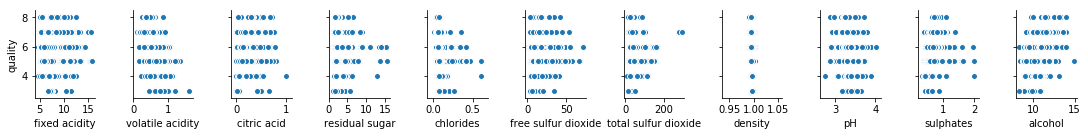

In [63]:
sns.pairplot(data, x_vars=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'], y_vars='quality',size=2, aspect=0.7)

In [50]:
X_Data = data.drop(['quality'],axis=1)

In [51]:
X_Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [52]:
Y_label = data['quality']

#### Splitting the data into training and testing set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_label, test_size=0.3, random_state=42)

In [41]:
mean = X_Data.mean(axis=0)
X_train -= mean
std = X_Data.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

#### Using the Keras Sequential model (Dense layer or fully connected layer) to predict the wine quality using regression

In [42]:
model = models.Sequential()

In [43]:
model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [44]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [45]:
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
1119/1119 [==============================] - 0s 207us/step - loss: 5.5928 - mean_absolute_error: 1.8260
Epoch 2/10
1119/1119 [==============================] - 0s 107us/step - loss: 1.6074 - mean_absolute_error: 0.9907
Epoch 3/10
1119/1119 [==============================] - 0s 104us/step - loss: 1.0727 - mean_absolute_error: 0.8029
Epoch 4/10
1119/1119 [==============================] - 0s 108us/step - loss: 0.8172 - mean_absolute_error: 0.7009
Epoch 5/10
1119/1119 [==============================] - 0s 107us/step - loss: 0.6611 - mean_absolute_error: 0.6301
Epoch 6/10
1119/1119 [==============================] - 0s 116us/step - loss: 0.5525 - mean_absolute_error: 0.5738
Epoch 7/10
1119/1119 [==============================] - 0s 225us/step - loss: 0.4941 - mean_absolute_error: 0.5413
Epoch 8/10
1119/1119 [==============================] - 0s 179us/step - loss: 0.4582 - mean_absolute_error: 0.5117
Epoch 9/10
1119/1119 [==============================] - 0s 109us/step - loss: 0.

#### Evaluating the data on the test datasets and displaying the loss and Mean Absolute Errors that has been achieved 

In [46]:
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)

In [47]:
print(test_mae)

0.5782677253087362
